In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("F:\Assignment\Csv\datasets_diabetesUC.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking for datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df['Pregnancies'].unique()
df['Pregnancies']=df['Pregnancies'].replace('Ten','10')
#Converting Pregnancies feature into int type
df['Pregnancies']=df['Pregnancies'].astype('int')
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

<AxesSubplot:>

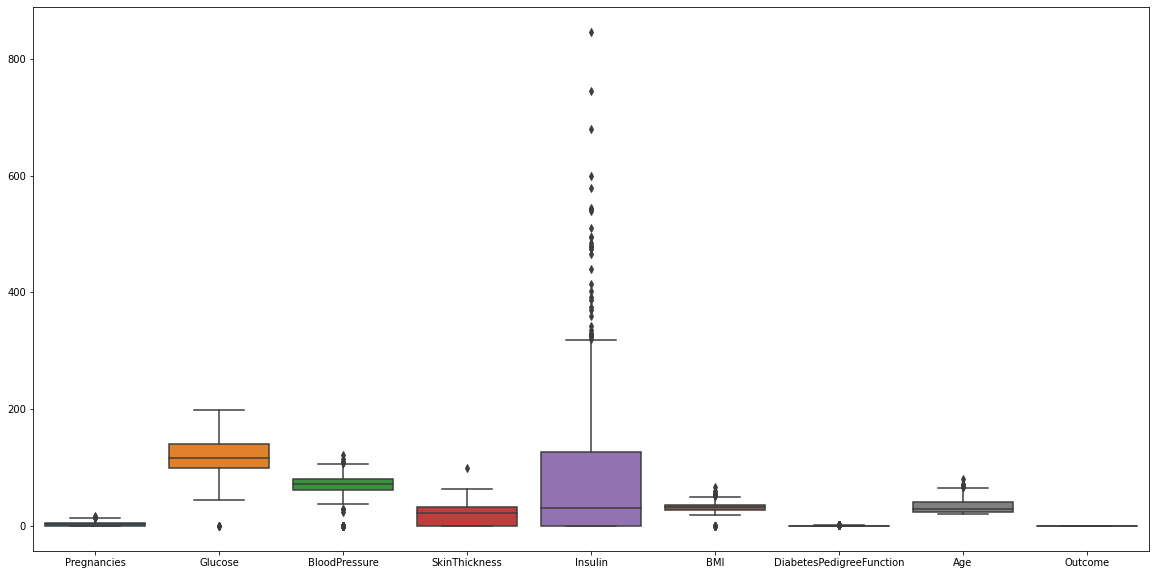

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
# insulin columns contains more outliers

# Removing outliers

318.125
(768, 9)


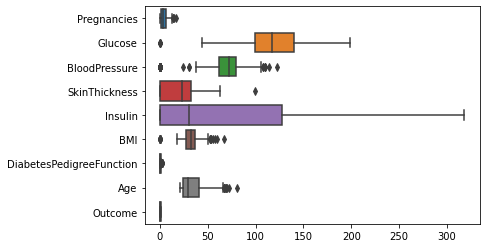

In [7]:
q75,q25=np.percentile(df['Insulin'],[75,25])
# Calculating IQR
iqr=q75-q25
whisker=q75+(1.5*iqr)
print(whisker)
#Capping the outliers to the upperwhisker value
df['Insulin']=df['Insulin'].clip(upper=whisker)
sns.boxplot(data=df,orient='h')
print(df.shape)

# Handling Null values

In [9]:
# As null values are present as '0', checking the total count of '0'
a=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print((df.iloc[:,1:6 ] == 0).sum())
# Replacing 0 with np.NaN to make sure the values are null
df.iloc[:, 1:6] = df.iloc[:,1:6].replace(0, np.NaN)
# Filling all nan values by mean
df.iloc[:,1:6]=df.iloc[:,1:6].fillna(df.iloc[:,1:6].median())
df.isnull().sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualization of Features

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

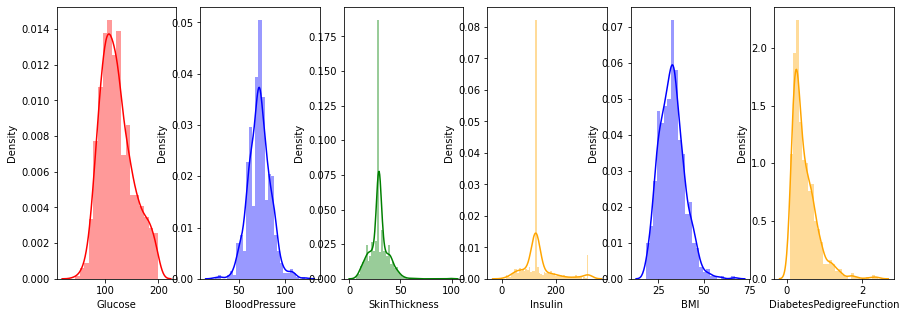

In [10]:
#x.hist(figsize=(20,15))
#plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
sns.distplot(df['Glucose'],color='red')

plt.subplot(1,6,2)
sns.distplot(df['BloodPressure'],color='blue')

plt.subplot(1,6,3)
sns.distplot(df['SkinThickness'],color='green')

plt.subplot(1,6,4)
sns.distplot(df['Insulin'],color='orange')
plt.subplot(1,6,5)
sns.distplot(df['BMI'],color='blue')
plt.subplot(1,6,6)
sns.distplot(df['DiabetesPedigreeFunction'],color='orange')
#here most featrures are right skewed

<AxesSubplot:xlabel='Age', ylabel='Density'>

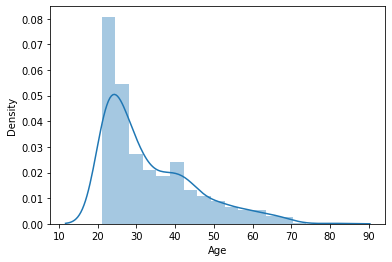

In [11]:
sns.distplot(df['Age'])
#Mostpeoples are age between 20 t0 60

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

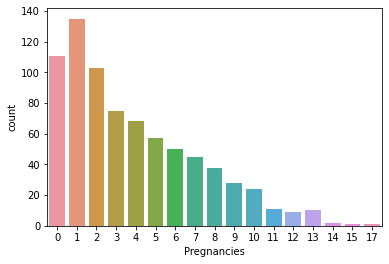

In [12]:
sns.countplot(df['Pregnancies']) 

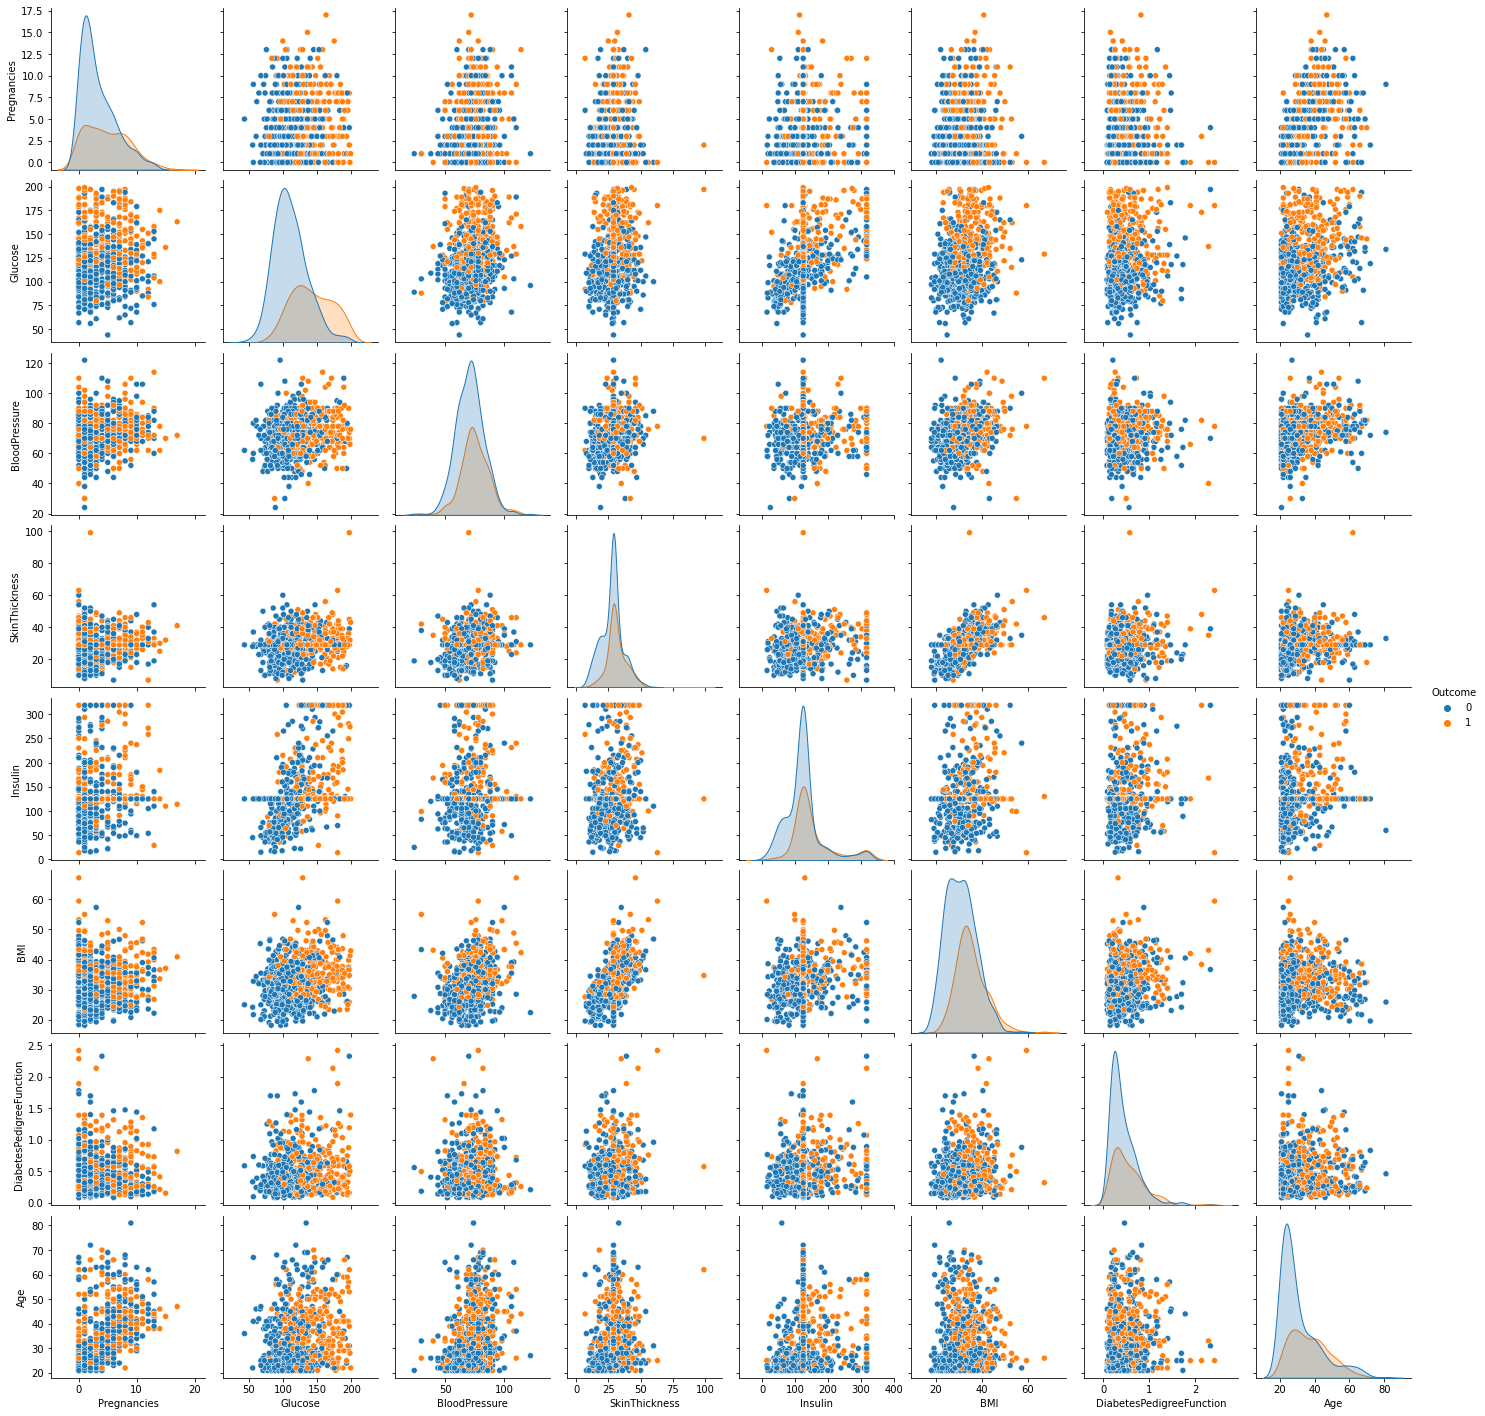

In [14]:
sns.pairplot(data=df,hue='Outcome')

<AxesSubplot:>

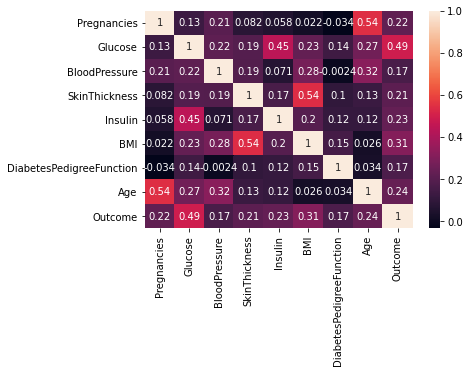

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
x=df.drop('Outcome',axis=1)

In [17]:
# Standardizing/Normalizing the variable using MinMaxsclaer - Bringing down the value between [0,1] 
x= StandardScaler().fit_transform(x)

# KMeans Clusturing

In [21]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters=cluster, init='k-means++')
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

In [25]:
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})


Text(0, 0.5, 'Inertia Value')

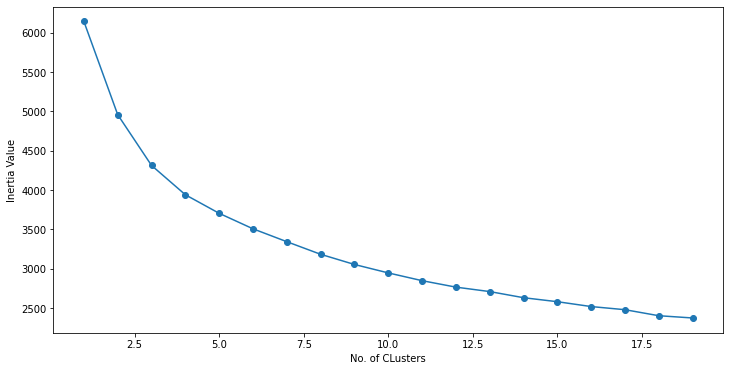

In [23]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('No. of CLusters')
plt.ylabel('Inertia Value')

In [26]:
kmeans = KMeans(n_jobs = -1, n_clusters=6, init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=6, n_jobs=-1)

In [27]:
pred = kmeans.predict(x)
kmeans.inertia_

3513.367258993179

In [29]:
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    201
4    172
0    147
5    130
2     65
3     53
Name: cluster, dtype: int64

In [31]:
frame[frame['cluster']==2]

,0,1,2,3,4,5,6,7,cluster
8,-0.547919,2.476909,-0.197433,1.808882,3.025798,-0.284572,-0.947944,1.681259,2
13,-0.844885,2.213910,-1.024647,-0.695245,3.025798,-0.342790,-0.223115,2.191785,2
20,-0.250952,0.142800,1.291553,1.353586,1.655866,0.996229,0.701041,-0.531023,2
31,-0.250952,1.194792,0.298896,0.784467,1.820669,-0.124472,1.144999,-0.445935,2
43,1.530847,1.622164,3.111425,-0.581421,1.738267,1.884057,0.752383,1.766346,2
...,...,...,...,...,...,...,...,...,...
710,-0.250952,1.194792,-0.693761,-1.833485,3.025798,-0.182690,-0.534187,-0.786286,2
713,-1.141852,0.405798,-1.190090,-1.036717,2.578767,-0.881309,-0.362041,-1.041549,2
715,0.936914,2.148161,-1.851862,0.442995,3.025798,0.210283,1.069496,0.064591,2
748,-0.250952,2.148161,-0.197433,-0.809069,1.079052,0.574147,-0.192914,0.234767,2


# Hierarchical Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="average")
model = model.fit(x)
print(model.n_clusters_)
distances = model.distances_
print(distances.min(),distances.max())

768
0.30566665391940806 9.121096036566394


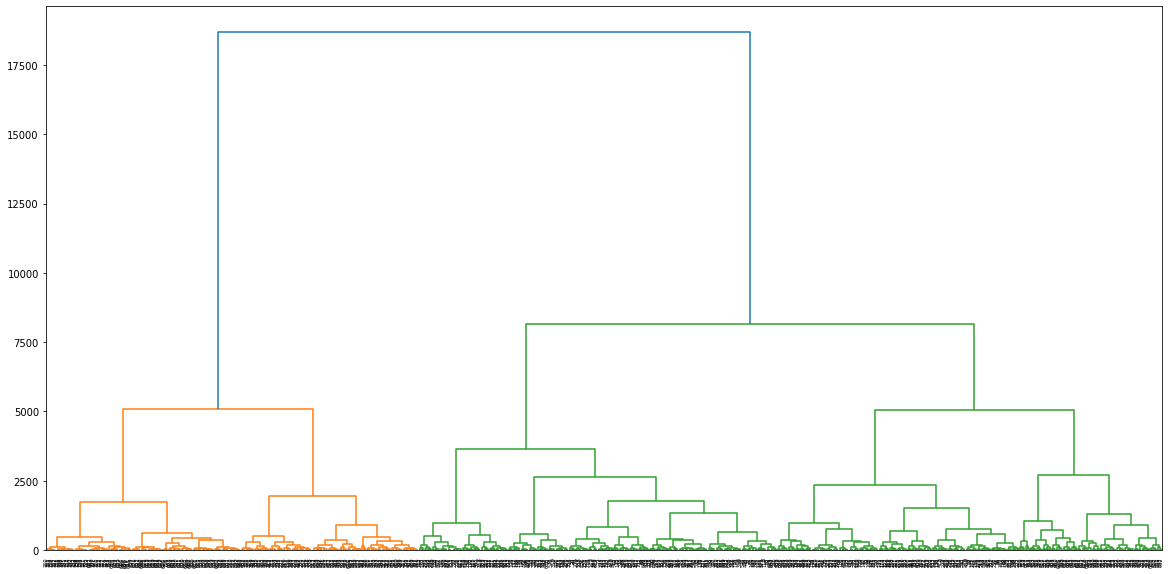

In [37]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [41]:
model = AgglomerativeClustering(distance_threshold=9, n_clusters=None, linkage="average")
model = model.fit(x)
print(model.n_clusters_)

2


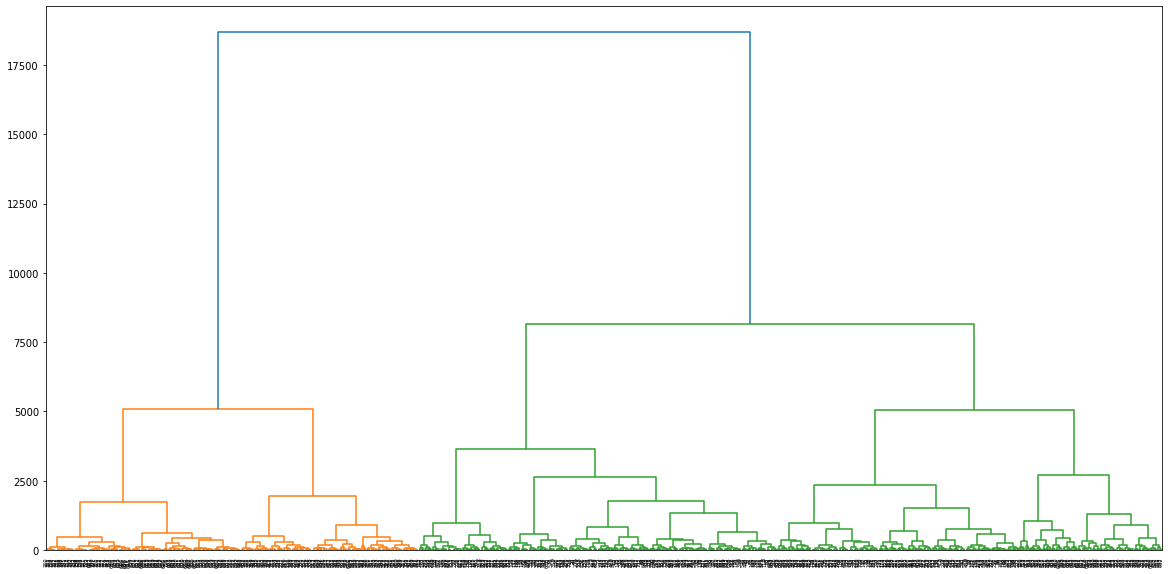

In [42]:
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)